# Quickstart

VIABEL currently supports both standard KL-based variational inference (KLVI) and chi-squared variational inference (CHIVI). Models are provided as Autograd-compatible log densities or can be constructed from PyStan fit objects.

As a simple example, we consider Neal's funnel distribution in 2 dimensions so that we can visualize the results.

In [1]:
import autograd.numpy as np
import autograd.scipy.stats.norm as norm

D = 2  # number of dimensions
log_sigma_stdev = 1.35
def log_density(x):
    mu, log_sigma = x[:, 0], x[:, 1]
    sigma_density = norm.logpdf(log_sigma, 0, log_sigma_stdev)
    mu_density = norm.logpdf(mu, 0, np.exp(log_sigma))
    return sigma_density + mu_density

VIABEL's `bbvi` function provides reasonable defaults: the objective is the ELBO (i.e., the including Kullback-Leibler divergence), a mean-field Gaussian approximation family, and windowed version of adagrad for stochastic optimization:

In [2]:
from viabel import bbvi
results = bbvi(D, n_iters=5000, log_density=log_density)

Average Loss = 0.77739: 100%|██████████| 5000/5000 [00:11<00:00, 437.48it/s]


We can then plot contours the from the approximation Gaussian (red) and the target funnel distribution (black)

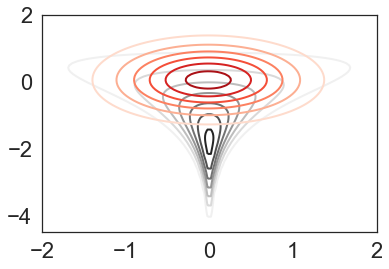

In [3]:
from experiments import plot_approx_and_exact_contours
import seaborn as sns

sns.set_style('white')
sns.set_context('notebook', font_scale=2, rc={'lines.linewidth': 2})

plot_approx_and_exact_contours(log_density, results['approx'], results['var_param'], 
                               xlim=[-2, 2], ylim=[-4.5,2], savepath='funnel.png')